In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os

Format of the file: age_gender_ethnicity_datetime
## Load and Visualize data

In [2]:
path = "UTKFace/"
files = os.listdir(path)
#la lista dei file viene caricata in modo arbitratrio, quindi la ordino per conformarla
files.sort()
size = len(files)
print("Total samples:",size)
#print(files[0]) 

Total samples: 23708


In [3]:
import cv2
images = []
ages = []
genders = []
ethnicities = [] 
#prova = cv2.imread(path+files[43])
#cv2.imshow('prova',prova)
#cv2.waitKey()
#cv2.destroyAllWindows()

for file in files:
    image = cv2.imread(path + file, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, dsize=(64,64))
    #image = image.reshape((-1,image.shape[0],image.shape[1],3))
    images.append(image)
    split_var = file.split('_')
    ages.append(int(split_var[0]))
    genders.append(int(split_var[1]))
    ethnicities.append(int(split_var[2]))
    


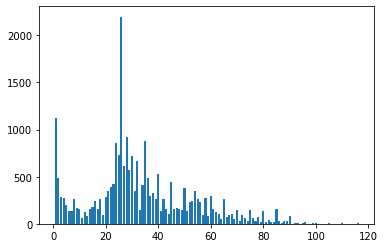

Max value: 116


In [4]:
import matplotlib.pyplot as plt
x_ages = list(set(ages))
y_ages = [ages.count(i) for i in x_ages]
plt.bar(x_ages,y_ages)
plt.show()
print("Max value:",max(ages))

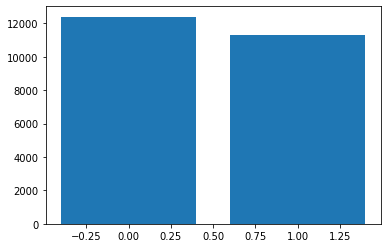

In [5]:
x_genders = list(set(genders))
y_genders = [genders.count(i) for i in x_genders]
plt.bar(x_genders,y_genders)
plt.show()

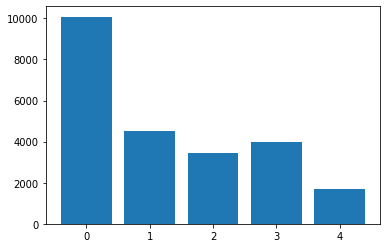

In [6]:
x_ethnicities = list(set(ethnicities))
y_ethnicities = [ethnicities.count(i) for i in x_ethnicities]
plt.bar(x_ethnicities,y_ethnicities)
plt.show()

Age: 105
Gender: 0
Ethnicity: 0


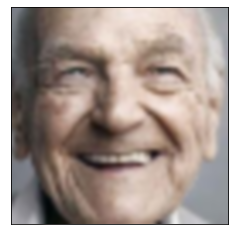

In [7]:
def display(img):
    #squeeze remove single-dimensional entries from the shape of an array.
    #img = np.squeeze(img)
    plt.imshow(img, interpolation='bicubic')
    plt.xticks([]), plt.yticks([]) 
    plt.show()

#X = np.squeeze(images)
idx = 14
sample = images[idx]
print("Age:",ages[idx])
print("Gender:",genders[idx])
print("Ethnicity:",ethnicities[idx])
display(images[1])

# def display(img):
   # plt.imshow(img[:,:])
  #  plt.show()
    

idx = 14
sample = images[idx]
print("Age:",ages[idx])
print("Gender:",genders[idx])
print("Ethnicity:",ethnicities[idx])
display(sample)



In [8]:
# pre processing
#target = np.zeros(size,dtype='int32')
features = []

for i in range(size):
    #target[i] = int(ages[i])
    
    featElement = np.array([int(genders[i]),int(ethnicities[i])])
    features.append(featElement)
    
    #CAPIRE SIGNIFICATO
#features[i] = features[i] / 255

features = np.asarray(features)

In [9]:
target = ages
images = np.array(images)
images = images / 255
#numericalFeatures = np.array([genders,ethnicities])
#df = pd.DataFrame([genders,ethnicities])

In [10]:
images[0]


array([[[0.82745098, 0.79215686, 0.77254902],
        [0.79215686, 0.75686275, 0.72941176],
        [0.65490196, 0.61960784, 0.58823529],
        ...,
        [0.38039216, 0.4       , 0.40392157],
        [0.36470588, 0.38431373, 0.39607843],
        [0.35686275, 0.37254902, 0.41568627]],

       [[0.76862745, 0.73333333, 0.71372549],
        [0.78039216, 0.74509804, 0.71764706],
        [0.58431373, 0.54901961, 0.51764706],
        ...,
        [0.38431373, 0.4       , 0.40392157],
        [0.37647059, 0.38823529, 0.40392157],
        [0.36862745, 0.37647059, 0.42352941]],

       [[0.83137255, 0.79607843, 0.77647059],
        [0.69411765, 0.65882353, 0.63137255],
        [0.65098039, 0.61568627, 0.58431373],
        ...,
        [0.40784314, 0.41568627, 0.41960784],
        [0.39215686, 0.39607843, 0.41568627],
        [0.37254902, 0.37254902, 0.41568627]],

       ...,

       [[0.95294118, 0.94901961, 0.97254902],
        [0.93333333, 0.92941176, 0.95294118],
        [0.92941176, 0

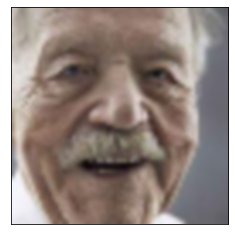

Name: 100_0_0_20170112215240346.jpg.chip.jpg
Age: 100
Sex: 0
Ethnicity: 0


In [11]:
idx=1
display(images[0])
print("Name:",files[idx])
print("Age:",target[idx])
print("Sex:",features[idx][1])
print("Ethnicity:",features[idx][1])

In [12]:
from sklearn.model_selection import train_test_split

#oltre ai soliti primi 4 parametri, inserisco name_train e name_test per inserire i nomi dei file per poterli dividere in cartelle
images_train, images_test, feat_train, feat_test, y_train, y_test, fileName_train, fileName_test = train_test_split(images, features, target, files, test_size=0.3,random_state=42,shuffle=True)
print("Samples in Training:",images_train.shape[0])
print("Samples in Testing:",images_test.shape[0])


Samples in Training: 16595
Samples in Testing: 7113


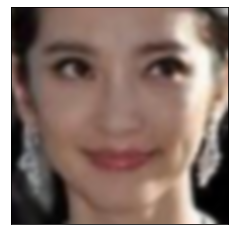

26
[1 2]
26_1_2_20170116184453651.jpg.chip.jpg


In [13]:
idx=1
display(images_train[idx])
print(y_train[idx])
print(feat_train[idx])
print(fileName_train[idx])

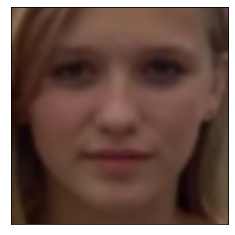

17
[1 0]
17_1_0_20170109214200825.jpg.chip.jpg


In [14]:
idx=1
display(images_test[idx])
print(y_test[idx])
print(feat_test[idx])
print(fileName_test[idx])

In [15]:
from pathlib import Path
import shutil
from collections import Counter

#controllo se le cartelle test e training sono già presenti
print("Cartella training?",os.path.isdir("training"))
print("Cartella test?",os.path.isdir("test"))



#controllo se i dati sono già presenti nelle cartelle (non è la prima esecuzione del codice)
firstExec = True
#DA MIGLIORARE EFFICIENZA
if((os.path.isdir("training")) and (os.path.isdir("test"))):
    trElements = os.listdir("training/")
    teElements = os.listdir("test/")
    if((Counter(fileName_train) == Counter(trElements)) and (Counter(fileName_test) == Counter(teElements))):
        firstExec = False

print("Prima esecuzione?",firstExec)

Cartella training? True
Cartella test? True
Prima esecuzione? False


In [16]:
#se è la prima esecuzione creo le cartelle e vi inserisco i file        
if(firstExec):
    #creo la cartella dove inserire le immagini di training
    Path("training").mkdir(parents=True, exist_ok=True)
    
    #copio le immagini di training
    for i in range(0,x_train.shape[0]):
        shutil.copy(path+name_train[i],"training/"+name_train[i])
    trElements = os.listdir("training/")
    #print(set(name_train).symmetric_difference(set(trElements)))
    assert Counter(name_train) == Counter(trElements),set(name_train).symmetric_difference(set(trElements))
    
    #creo la cartella dove inserire le immagini di test
    Path("test").mkdir(parents=True, exist_ok=True)
    #copio le immagini di test
    for i in range(0,x_test.shape[0]):
        shutil.copy(path+name_test[i],"test/"+name_test[i])
    teElements = os.listdir("test/")
    assert Counter(name_test) == Counter(teElements),set(name_test).symmetric_difference(set(teElements))
    

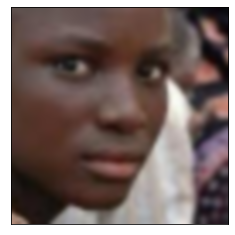

19
19_1_1_20170112191242381.jpg.chip.jpg


In [17]:
idx=50
display(images_train[idx])
print(y_train[idx])
print(fileName_train[idx])

In [18]:
#Utility per stampare lista file testing
f= open("test.txt","w+")
for i in range(0,len(os.listdir("test/"))):
        f.write(fileName_test[i]+"\n")
f.close()

## Build Model

In [19]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [50]:
#Necessità di aggiungere all'environment:
#conda install graphviz
#conda install pydotplus

import keras 
import matplotlib.pyplot as plt
from keras.utils import plot_model
import tensorflow as tf
from keras.layers import *
from keras.models import *
from IPython.display import Image
#from graphviz import Digraph
from keras import backend as K


def create_cnn_model():

    filters=(16, 32, 64)
    
    # initialize the input shape and channel dimension, assuming
    # TensorFlow/channels-last ordering
    inputShape = (64, 64, 3)
    chanDim = -1
    
    # define the model input
    inputs = Input(shape=inputShape)
    
    # loop over the number of filters
    for (i, f) in enumerate(filters):
        # if this is the first CONV layer then set the input
        # appropriately
        if i == 0:
            x = inputs
        # CONV => RELU => BN => POOL
        x = Conv2D(f, (3, 3), padding="same")(x)
        x = Activation("relu")(x)
        x = BatchNormalization(axis=chanDim)(x)
        x = MaxPooling2D(pool_size=(2, 2))(x)
        
    # flatten the volume, then FC => RELU => BN => DROPOUT
    x = Flatten()(x)
    
    #shape degli attributi numerici
    aux_rand = Input(shape=(2,))
    x = keras.layers.Concatenate(axis=1)([x, aux_rand])
    x = Dense(16)(x)
    x = Activation("relu")(x)
    x = BatchNormalization(axis=chanDim)(x)
    x = Dropout(0.5)(x)

    x = Dense(2)(x)
    x = Activation("relu")(x)
    x = Dense(1, activation="linear")(x)

        
    # construct the CNN
    model = Model([inputs, aux_rand], x)
    model.compile(loss="mean_absolute_percentage_error", optimizer='adam')
    #plot_model(model,to_file='demo.png',show_shapes=True)
    tf.keras.utils.plot_model(model, 'model.png',show_shapes=True)  
    # return the CNN
    return model        
        
    

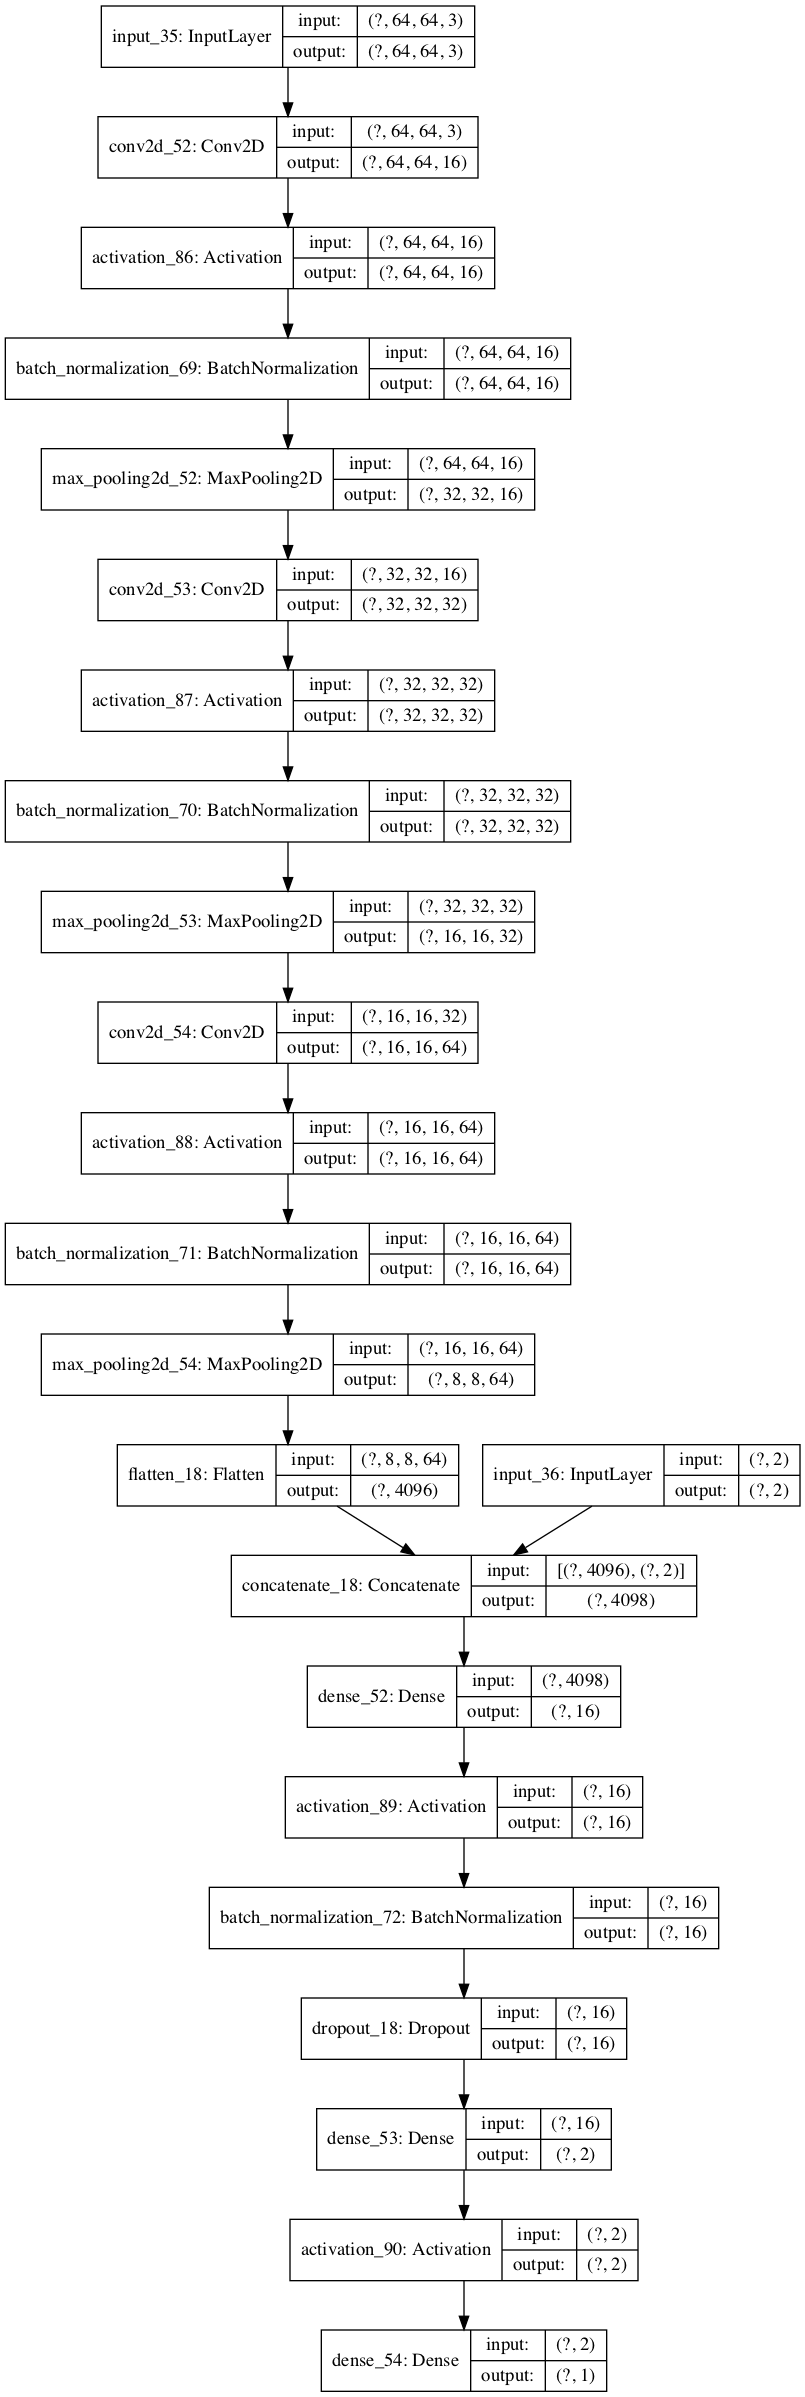

In [53]:
model = create_cnn_model()
Image('model.png')

In [54]:
# train the model
print("[INFO] training model...")
model.fit([images_train, feat_train], y_train, epochs=200, batch_size=8)

[INFO] training model...
Epoch 1/200
  648/16595 [>.............................] - ETA: 1:19 - loss: 93.9752

KeyboardInterrupt: 

## GridSearchCV

In [112]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense 

clasf = KerasRegressor(build_fn = create_cnn_model)

parameters = {'batch_size': [25, 32, 100, 80],
             'nb_epoch' : [100, 500], 
             'optimizer' : ['adam', 'rmsprop'] }

# specifichiamo di voler massimizzare l'accuracy e di utilizzare una cross-validation = 10.
grid_search = GridSearchCV(estimator = clasf, param_grid = parameters, scoring = 'neg_mean_squared_error', cv = 10, n_jobs=-1)

In [113]:
# grid search proverà tutte le conbinazioni e ci restituirà quella ottimale.
grid_search.fit([images_train, feat_train], y_train)

ValueError: Found input variables with inconsistent numbers of samples: [2, 16595]

In [ ]:
best_parameters = grid_search.best_params_
best_parameters

## K-FOLD VALIDATION

In [ ]:
from keras.wrappers.scikit_learn import KerasRegressor 
from sklearn.model_selection import cross_val_score

In [ ]:
clasf = KerasRegressor(build_fn = model, batch_size = 80, nb_epoch = 100) 
accuracies = cross_val_score(estimator = clasf, X =[feat_train, images_train], y = y_train, cv = 10, n_jobs = -1) # cv = 10
# n_jobs = -1 use all the CPU to do parallel computation 
#cv indica il numero di fold in cui è stato suddiviso il training data.

In [ ]:
accuracies # this is the relevant result 
#Abbiamo 10 valori di accuracy poiché è stato effettuato il test su 10 fold diversi.

In [ ]:
# let's compute the mean of the accuracies 
mean = accuracies.mean()
mean

In [ ]:
variance = accuracies.std()
variance 

In [ ]:
#image = x_train[0][0].reshape(-1,64,64,3)
#print(image.shape)